# Linear Regression from Scratch

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [7]:
# load data
data = load_diabetes()
X = data.data
y = data.target

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# train linear regression (from scratch)
lr_scratch = LinearRegressionScratch(learning_rate=.1, n_iters=1000)
lr_scratch.fit(X_train, y_train)
y_pred_scratch = lr_scratch.predict(X_test)

# calculate MSE for scratch implementation
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
print(mse_scratch)

3504.132245400119


In [24]:
# train linear regression (sklearn)
lr_sklearn = SklearnLinearRegression()
lr_sklearn.fit(X_train, y_train)
y_pred_sklearn = lr_sklearn.predict(X_test)

# calculate MSE for sklearn implementation
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(mse_sklearn)

2900.19362849348


In [25]:
# compare results
print(f"Weights (Scratch): {lr_scratch.weights}")
print(f"Weights (Scikit-learn): {lr_sklearn.coef_}")
print(f"Bias (Scratch): {lr_scratch.bias}")
print(f"Bias (Scikit-learn): {lr_sklearn.intercept_}")

Weights (Scratch): [ 43.87304322 -14.17838494 168.93514218 123.79117355  34.32252103
  19.70819514 -98.95584562 100.6055088  147.17029796  97.03279718]
Weights (Scikit-learn): [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Bias (Scratch): 152.78028087095873
Bias (Scikit-learn): 151.34560453985995


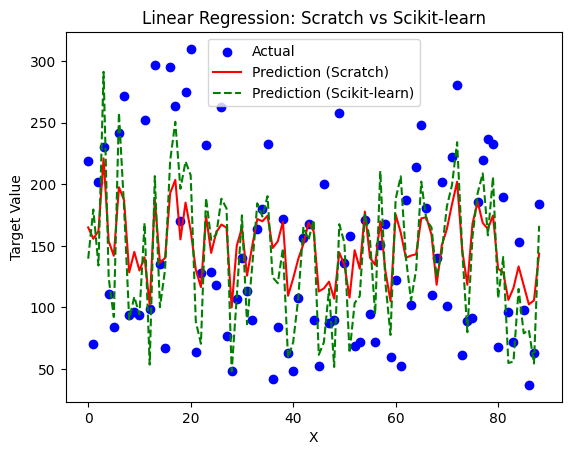

In [27]:
# plot results
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_test)), y_pred_scratch, color='red', label='Prediction (Scratch)')
plt.plot(range(len(y_test)), y_pred_sklearn, color='green', linestyle='dashed', label='Prediction (Scikit-learn)')
plt.xlabel('X')
plt.ylabel('Target Value')
plt.legend()
plt.title('Linear Regression: Scratch vs Scikit-learn')
plt.show()